# Task 3 - Modeling


## Section 1 - Setup


We want to use dataframes once again to store and manipulate the data.

In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

---

## Section 2 - Data loading

Let's load our data for the 3 datasets provided. Be sure to upload the datasets into the destination file, so that you can access them here.

In [3]:
sales_df = pd.read_csv("sales.csv")
sales_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
sales_df.head()

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card


In [4]:
stock_df = pd.read_csv("sensor_stock_levels.csv")
stock_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
stock_df.head()

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:13:02,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:39:46,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:17:43,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:29:09,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:46:18,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22


In [5]:
temp_df = pd.read_csv("sensor_storage_temperature.csv")
temp_df.drop(columns=["Unnamed: 0"], inplace=True, errors='ignore')
temp_df.head() 

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38


In [6]:
sales_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7829 entries, 0 to 7828
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   transaction_id  7829 non-null   object 
 1   timestamp       7829 non-null   object 
 2   product_id      7829 non-null   object 
 3   category        7829 non-null   object 
 4   customer_type   7829 non-null   object 
 5   unit_price      7829 non-null   float64
 6   quantity        7829 non-null   int64  
 7   total           7829 non-null   float64
 8   payment_type    7829 non-null   object 
dtypes: float64(2), int64(1), object(6)
memory usage: 550.6+ KB


## Section 3- Data preprocessing 

### Data visualisation for temperature 

In [7]:
#convert the timestamp to pandas datetime 
ts = []
for t in sales_df['timestamp']:
    t = pd.Timestamp(t)
    ts.append(t)

In [8]:
sales_df.timestamp = ts
sales_df.transaction_id = sales_df.transaction_id.astype('str')
sales_df.product_id = sales_df.product_id.astype('str')
#to check for hidden NaN values
sales_df.loc[sales_df['unit_price']==0.0]

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type


In [9]:
sales_df.columns[sales_df.isnull().any()]

Index([], dtype='object')

In [10]:
#temperature 
ts1 = []
for time in temp_df['timestamp']:
    time = pd.Timestamp(time)
    ts1.append(time)

In [11]:
temp_df['timestamp'] = ts1

In [12]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23890 entries, 0 to 23889
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   id           23890 non-null  object        
 1   timestamp    23890 non-null  datetime64[ns]
 2   temperature  23890 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 560.0+ KB


In [13]:
temp_df

,id,timestamp,temperature
0,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2022-03-07 15:55:20,2.96
1,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,2022-03-01 09:18:22,1.88
2,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,2022-03-04 15:12:26,1.78
3,9500357b-ce15-424a-837a-7677b386f471,2022-03-02 12:30:42,2.18
4,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,2022-03-05 09:09:33,1.38
...,...,...,...
23885,17bcff56-9965-4e9f-ad5f-107f0f3be93f,2022-03-01 10:40:43,-1.46
23886,51d4eb44-04bd-4d6a-b777-0653bc173303,2022-03-05 17:07:49,-19.37
23887,bbcacfc4-3b59-47ee-b9e1-7dd3bd588748,2022-03-01 16:15:41,-2.89
23888,5c4d567b-4bcf-4fcd-86b7-e2db5de6e439,2022-03-07 14:44:52,-2.56


In [14]:
temp_df.set_index('timestamp',inplace=True)

In [15]:
#resample temperature timestamp to hourly
hourly_temp = temp_df.resample('H').mean()


In [16]:
hourly_temp

,temperature
timestamp,
2022-03-01 09:00:00,-0.028850
2022-03-01 10:00:00,1.284314
2022-03-01 11:00:00,-0.560000
2022-03-01 12:00:00,-0.537721
2022-03-01 13:00:00,-0.188734
...,...
2022-03-07 15:00:00,-0.943848
2022-03-07 16:00:00,-0.230631
2022-03-07 17:00:00,-0.003988


In [17]:
#sample visualisation of target date
target_date = '2022-03-01'

In [18]:
subset_df = temp_df[temp_df.index.date == pd.to_datetime(target_date).date()]

In [19]:
subset_df.resample('H').mean()

,temperature
timestamp,
2022-03-01 09:00:00,-0.028850
2022-03-01 10:00:00,1.284314
2022-03-01 11:00:00,-0.560000
2022-03-01 12:00:00,-0.537721
2022-03-01 13:00:00,-0.188734
2022-03-01 14:00:00,0.816969
2022-03-01 15:00:00,0.337059
2022-03-01 16:00:00,0.560063
2022-03-01 17:00:00,-0.376415


In [20]:
target_dates = ['2022-03-01', '2022-03-02', '2022-03-03', '2022-03-04', '2022-03-05', '2022-03-06', '2022-03-07']


In [21]:
#uploading list of dataframes with each target date
subsets = []
for date in target_dates:
    subset_df = temp_df[temp_df.index.date == pd.to_datetime(date).date()]
    subsets.append(subset_df)

In [22]:
subsets[3]

,id,temperature
timestamp,,
2022-03-04 15:12:26,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,1.78
2022-03-04 15:18:25,04766f4f-a431-4853-92c9-a6b28b7f7abb,-3.03
2022-03-04 18:33:19,c91ffc9c-0e81-4ccb-81c3-dae394094820,1.65
2022-03-04 19:55:22,d5b561a8-50b9-482a-b1e0-b5d61e8d8030,-3.62
2022-03-04 18:56:26,16bd9151-9769-40be-a8f3-546bac34bdb4,27.85
...,...,...
2022-03-04 09:18:22,6609fb61-9fbe-4a7c-9081-b2f857e1a241,1.75
2022-03-04 15:27:57,f7a0db2a-8227-4174-9b2c-c1f7c25f174a,2.81
2022-03-04 09:52:53,825243d1-df5d-4ce4-a649-2874ee6f8fff,0.27


In [23]:
#function to upload the list with resampled timestamps 
def resample_subsets(subsets, freq='1H'):
    resampled_subsets = []

    for subset in subsets:
        subset_resampled = subset.resample(freq).mean().reset_index()
        resampled_subsets.append(subset_resampled)

    return resampled_subsets

In [24]:
re_sub = resample_subsets(subsets)

In [25]:
hourly_temp.reset_index(inplace=True)

In [26]:
days = hourly_temp['timestamp'].dt.date.unique()

In [27]:
#plot trend temperature trend line to visualise the temperature drop and lift
import plotly.graph_objects as go
fig = go.Figure()

In [28]:
#plot the trend line using plotly library 
#differentiate each day of the week with different colours
#
for i, day in enumerate(days,1):
    daily_data = hourly_temp[hourly_temp['timestamp'].dt.date == day]
    fig.add_trace(go.Scatter(x=daily_data['timestamp'], y= daily_data['temperature'],
                             mode ='lines',
                             name = f'Day{i}'))

fig.update_layout(title='Trend Line of Total Sales from 01/03 to 07/03',
                  xaxis_title='Date and Hour',
                  yaxis_title='Total Sales',
                  xaxis=dict(tickangle=45),
                  showlegend=True,
                  height=800,
                  width=1000)

fig.show()

In [29]:
temp_copy = temp_df.copy()


In [30]:
temp_copy.reset_index(inplace=True)
temp_copy['Date'] = temp_copy['timestamp'].dt.date
temp_copy['Hours'] = temp_copy['timestamp'].dt.hour

In [31]:
temp_copy

,timestamp,id,temperature,Date,Hours
0,2022-03-07 15:55:20,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2.96,2022-03-07,15
1,2022-03-01 09:18:22,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,1.88,2022-03-01,9
2,2022-03-04 15:12:26,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,1.78,2022-03-04,15
3,2022-03-02 12:30:42,9500357b-ce15-424a-837a-7677b386f471,2.18,2022-03-02,12
4,2022-03-05 09:09:33,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,1.38,2022-03-05,9
...,...,...,...,...,...
23885,2022-03-01 10:40:43,17bcff56-9965-4e9f-ad5f-107f0f3be93f,-1.46,2022-03-01,10
23886,2022-03-05 17:07:49,51d4eb44-04bd-4d6a-b777-0653bc173303,-19.37,2022-03-05,17
23887,2022-03-01 16:15:41,bbcacfc4-3b59-47ee-b9e1-7dd3bd588748,-2.89,2022-03-01,16
23888,2022-03-07 14:44:52,5c4d567b-4bcf-4fcd-86b7-e2db5de6e439,-2.56,2022-03-07,14


In [32]:
temp_copy.Hours.value_counts()

12    2267
11    2215
9     2195
19    2192
13    2168
16    2162
14    2160
18    2145
17    2145
15    2144
10    2097
Name: Hours, dtype: int64

In [33]:
temp_copy

,timestamp,id,temperature,Date,Hours
0,2022-03-07 15:55:20,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2.96,2022-03-07,15
1,2022-03-01 09:18:22,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,1.88,2022-03-01,9
2,2022-03-04 15:12:26,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,1.78,2022-03-04,15
3,2022-03-02 12:30:42,9500357b-ce15-424a-837a-7677b386f471,2.18,2022-03-02,12
4,2022-03-05 09:09:33,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,1.38,2022-03-05,9
...,...,...,...,...,...
23885,2022-03-01 10:40:43,17bcff56-9965-4e9f-ad5f-107f0f3be93f,-1.46,2022-03-01,10
23886,2022-03-05 17:07:49,51d4eb44-04bd-4d6a-b777-0653bc173303,-19.37,2022-03-05,17
23887,2022-03-01 16:15:41,bbcacfc4-3b59-47ee-b9e1-7dd3bd588748,-2.89,2022-03-01,16
23888,2022-03-07 14:44:52,5c4d567b-4bcf-4fcd-86b7-e2db5de6e439,-2.56,2022-03-07,14


In [34]:
sales_df_copy = sales_df.copy()
sales_df_copy['Hours'] = sales_df_copy['timestamp'].dt.hour


In [35]:
sales_df_copy

,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,Hours
0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:51:38,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:33:59,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:20:21,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:23:58,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:32:43,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14
...,...,...,...,...,...,...,...,...,...,...
7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:22:09,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet,18
7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:14:46,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card,19
7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:09,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card,14
7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:11:38,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash,15


In [36]:
sales_df_copy.reset_index(inplace=True)

In [37]:
sales_df_copy['timestamp'] = pd.to_datetime(sales_df_copy['timestamp']).dt.strftime('%Y-%m-%d %H:00:00')
sales_df_copy

,index,transaction_id,timestamp,product_id,category,customer_type,unit_price,quantity,total,payment_type,Hours
0,0,a1c82654-c52c-45b3-8ce8-4c2a1efe63ed,2022-03-02 09:00:00,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit,gold,3.99,2,7.98,e-wallet,9
1,1,931ad550-09e8-4da6-beaa-8c9d17be9c60,2022-03-06 10:00:00,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit,standard,3.99,1,3.99,e-wallet,10
2,2,ae133534-6f61-4cd6-b6b8-d1c1d8d90aea,2022-03-04 17:00:00,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit,premium,0.19,2,0.38,e-wallet,17
3,3,157cebd9-aaf0-475d-8a11-7c8e0f5b76e4,2022-03-02 17:00:00,80da8348-1707-403f-8be7-9e6deeccc883,fruit,gold,0.19,4,0.76,e-wallet,17
4,4,a81a6cd3-5e0c-44a2-826c-aea43e46c514,2022-03-05 14:00:00,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit,basic,4.49,2,8.98,debit card,14
...,...,...,...,...,...,...,...,...,...,...,...
7824,7824,6c19b9fc-f86d-4526-9dfe-d8027a4d13ee,2022-03-03 18:00:00,bc6187a9-d508-482b-9ca6-590d1cc7524f,cleaning products,basic,14.19,2,28.38,e-wallet,18
7825,7825,1c69824b-e399-4b79-a5e7-04a3a7db0681,2022-03-04 19:00:00,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,standard,16.99,1,16.99,credit card,19
7826,7826,79aee7d6-1405-4345-9a15-92541e9e1e74,2022-03-03 14:00:00,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products,basic,14.19,2,28.38,credit card,14
7827,7827,e5cc4f88-e5b7-4ad5-bc1b-12a828a14f55,2022-03-04 15:00:00,707e4237-191c-4cc9-85af-383a6c1cb2ab,cleaning products,basic,16.99,4,67.96,cash,15


In [38]:
sales_df_copy.drop(columns='index',inplace=True)

In [39]:
sales_df_copy.drop(columns='Hours',inplace=True)

In [40]:
temp_copy['timestamp'] = pd.to_datetime(temp_copy['timestamp']).dt.strftime('%Y-%m-%d %H:00:00')
temp_copy

,timestamp,id,temperature,Date,Hours
0,2022-03-07 15:00:00,d1ca1ef8-0eac-42fc-af80-97106efc7b13,2.96,2022-03-07,15
1,2022-03-01 09:00:00,4b8a66c4-0f3a-4f16-826f-8cf9397e9d18,1.88,2022-03-01,9
2,2022-03-04 15:00:00,3d47a0c7-1e72-4512-812f-b6b5d8428cf3,1.78,2022-03-04,15
3,2022-03-02 12:00:00,9500357b-ce15-424a-837a-7677b386f471,2.18,2022-03-02,12
4,2022-03-05 09:00:00,c4b61fec-99c2-4c6d-8e5d-4edd8c9632fa,1.38,2022-03-05,9
...,...,...,...,...,...
23885,2022-03-01 10:00:00,17bcff56-9965-4e9f-ad5f-107f0f3be93f,-1.46,2022-03-01,10
23886,2022-03-05 17:00:00,51d4eb44-04bd-4d6a-b777-0653bc173303,-19.37,2022-03-05,17
23887,2022-03-01 16:00:00,bbcacfc4-3b59-47ee-b9e1-7dd3bd588748,-2.89,2022-03-01,16
23888,2022-03-07 14:00:00,5c4d567b-4bcf-4fcd-86b7-e2db5de6e439,-2.56,2022-03-07,14


In [41]:
temp_copy.drop(columns=['Date','Hours'],inplace=True)

In [42]:
sales_agg = sales_df_copy.groupby(['product_id','timestamp']).agg({'quantity':'sum'})

In [43]:
temp_agg = temp_copy.groupby('timestamp').agg({'temperature':'mean'})
temp_agg

,temperature
timestamp,
2022-03-01 09:00:00,-0.028850
2022-03-01 10:00:00,1.284314
2022-03-01 11:00:00,-0.560000
2022-03-01 12:00:00,-0.537721
2022-03-01 13:00:00,-0.188734
...,...
2022-03-07 15:00:00,-0.943848
2022-03-07 16:00:00,-0.230631
2022-03-07 17:00:00,-0.003988


In [44]:
stock_df['timestamp'] = pd.to_datetime(stock_df['timestamp']).dt.strftime('%Y-%m-%d %H:00:00')
stock_df

,id,timestamp,product_id,estimated_stock_pct
0,4220e505-c247-478d-9831-6b9f87a4488a,2022-03-07 12:00:00,f658605e-75f3-4fed-a655-c0903f344427,0.75
1,f2612b26-fc82-49ea-8940-0751fdd4d9ef,2022-03-07 16:00:00,de06083a-f5c0-451d-b2f4-9ab88b52609d,0.48
2,989a287f-67e6-4478-aa49-c3a35dac0e2e,2022-03-01 18:00:00,ce8f3a04-d1a4-43b1-a7c2-fa1b8e7674c8,0.58
3,af8e5683-d247-46ac-9909-1a77bdebefb2,2022-03-02 14:00:00,c21e3ba9-92a3-4745-92c2-6faef73223f7,0.79
4,08a32247-3f44-4002-85fb-c198434dd4bb,2022-03-02 13:00:00,7f478817-aa5b-44e9-9059-8045228c9eb0,0.22
...,...,...,...,...
14995,b9bf6788-09f3-490b-959b-dc5b55edb4b6,2022-03-04 10:00:00,e37658de-3649-4ddb-9c73-b868dd69d3fe,0.66
14996,9ff1cc01-020f-491a-bafd-13552dccff44,2022-03-02 12:00:00,fbeb39cc-8cd0-4143-bdfb-77658a02dec9,0.99
14997,4d8101de-e8a2-4af9-9764-7a3a22aa7084,2022-03-03 17:00:00,8e21dcec-d775-4969-8334-05a37a5fd189,0.72
14998,5f2a7b1e-b3c4-4395-8425-c960e22f701d,2022-03-02 19:00:00,9708cf5b-aa69-4320-a013-9d234c40e63f,0.95


In [45]:
stock_agg = stock_df.groupby(['product_id','timestamp']).agg({'estimated_stock_pct':'mean'})
stock_agg

estimated_stock_pct
product_id                           timestamp                               
00e120bb-89d6-4df5-bc48-a051148e3d03 2022-03-01 09:00:00                 0.89
                                     2022-03-01 11:00:00                 0.46
                                     2022-03-01 12:00:00                 0.85
                                     2022-03-01 13:00:00                 0.39
                                     2022-03-01 17:00:00                 0.57
...                                                                       ...
fd77b5cb-498c-40ca-95d1-0f87f13dd0d8 2022-03-06 17:00:00                 0.18
                                     2022-03-07 10:00:00                 0.16
                                     2022-03-07 11:00:00                 0.46
                                     2022-03-07 17:00:00                 0.31
                                     2022-03-07 18:00:00                 0.98

[10845 rows x 1 columns]

In [46]:
stock_agg.reset_index(inplace=True)
temp_agg.reset_index(inplace=True)
sales_agg.reset_index(inplace=True)


In [47]:
merged_df = sales_agg.merge(stock_agg, on=['product_id','timestamp'],how='left')
merged_df

,product_id,timestamp,quantity,estimated_stock_pct
0,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 09:00:00,3,0.89
1,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 17:00:00,1,0.57
2,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 09:00:00,4,0.40
3,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 10:00:00,1,0.69
4,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 11:00:00,3,NaN
...,...,...,...,...
6212,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,2022-03-06 13:00:00,1,NaN
6213,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,2022-03-06 14:00:00,4,0.68
6214,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,2022-03-06 19:00:00,2,NaN
6215,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,2022-03-07 10:00:00,2,0.16


In [48]:
merged_df = merged_df.merge(temp_agg,on='timestamp',how='left')
merged_df

,product_id,timestamp,quantity,estimated_stock_pct,temperature
0,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 09:00:00,3,0.89,-0.028850
1,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 17:00:00,1,0.57,-0.376415
2,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 09:00:00,4,0.40,-0.672900
3,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 10:00:00,1,0.69,-0.856840
4,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 11:00:00,3,NaN,-0.268298
...,...,...,...,...,...
6212,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,2022-03-06 13:00:00,1,NaN,-0.428084
6213,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,2022-03-06 14:00:00,4,0.68,-0.294007
6214,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,2022-03-06 19:00:00,2,NaN,-0.072701
6215,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,2022-03-07 10:00:00,2,0.16,-0.379524


<AxesSubplot:>

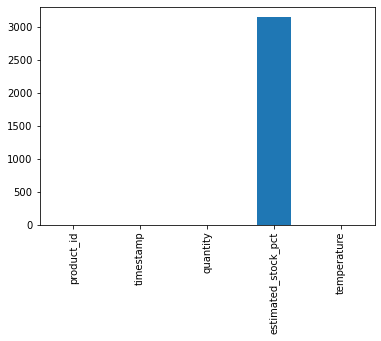

In [49]:
merged_df.isnull().sum().plot(kind='bar')

In [50]:
def plot_continuous_distribution(data: pd.DataFrame = None, column: str = None, height: int = 8):
  _ = sns.displot(data, x=column, kde=True, height=height, aspect=height/5).set(title=f'Distribution of {column}');

In [51]:
merged_df.describe()

,quantity,estimated_stock_pct,temperature
count,6217.000000,3067.000000,6217.000000
mean,3.150233,0.513799,-0.225974
std,1.911898,0.263062,0.653717
min,1.000000,0.010000,-1.847270
25%,2.000000,0.300000,-0.672900
50%,3.000000,0.515000,-0.234215
75%,4.000000,0.720000,0.160429
max,16.000000,1.000000,1.435938


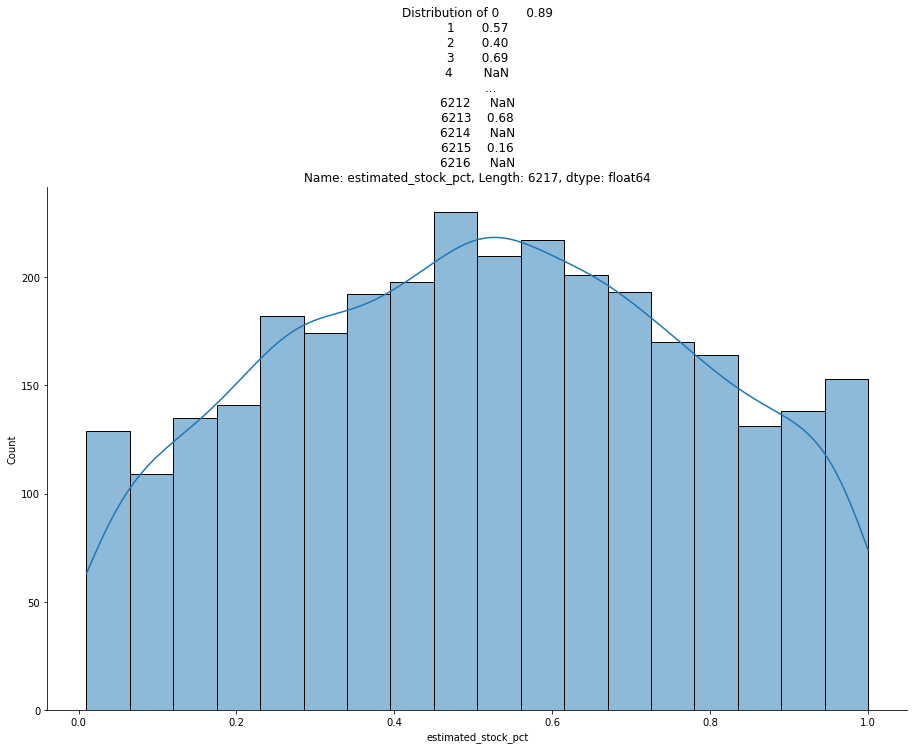

In [52]:
plot_continuous_distribution(merged_df,merged_df['estimated_stock_pct'])
plt.show()

In [53]:
#to check the correlation amongst continuous variables
merged_df.corr().style.background_gradient(cmap='coolwarm')

,quantity,estimated_stock_pct,temperature
quantity,1.000000,-0.012005,0.003014
estimated_stock_pct,-0.012005,1.000000,-0.009535
temperature,0.003014,-0.009535,1.000000


In [54]:
#additional continuous features that drove sales 
additional_features = sales_df_copy[['product_id','unit_price']]
additional_features = additional_features.drop_duplicates()
additional_features

,product_id,unit_price
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,3.99
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,3.99
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,0.19
3,80da8348-1707-403f-8be7-9e6deeccc883,0.19
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,4.49
...,...,...
7569,d6ccd088-11be-4c25-aa1f-ea87c01a04db,14.99
7570,20a9bd7b-daff-4b8b-bdc1-2e8f9a0277fa,13.49
7572,a9325c1a-2715-41df-b7f4-3078fa5ecd97,14.19
7576,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,16.99


In [55]:
#categorical features 
additional_category = sales_df_copy[['product_id','category']]
additional_category = additional_category.drop_duplicates()
additional_category

,product_id,category
0,3bc6c1ea-0198-46de-9ffd-514ae3338713,fruit
1,ad81b46c-bf38-41cf-9b54-5fe7f5eba93e,fruit
2,7c55cbd4-f306-4c04-a030-628cbe7867c1,fruit
3,80da8348-1707-403f-8be7-9e6deeccc883,fruit
4,7f5e86e6-f06f-45f6-bf44-27b095c9ad1d,fruit
...,...,...
7569,d6ccd088-11be-4c25-aa1f-ea87c01a04db,cleaning products
7570,20a9bd7b-daff-4b8b-bdc1-2e8f9a0277fa,cleaning products
7572,a9325c1a-2715-41df-b7f4-3078fa5ecd97,cleaning products
7576,0e4c10f4-77bc-4c67-86b2-b4da5ded19bf,cleaning products


In [56]:
new_merge = merged_df.merge(additional_category,on='product_id',how='left')
new_merge = new_merge.merge(additional_features, on='product_id',how='left')
new_merge

,product_id,timestamp,quantity,estimated_stock_pct,temperature,category,unit_price
0,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 09:00:00,3,0.89,-0.028850,kitchen,11.19
1,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-01 17:00:00,1,0.57,-0.376415,kitchen,11.19
2,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 09:00:00,4,0.40,-0.672900,kitchen,11.19
3,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 10:00:00,1,0.69,-0.856840,kitchen,11.19
4,00e120bb-89d6-4df5-bc48-a051148e3d03,2022-03-02 11:00:00,3,NaN,-0.268298,kitchen,11.19
...,...,...,...,...,...,...,...
6212,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,2022-03-06 13:00:00,1,NaN,-0.428084,snacks,3.19
6213,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,2022-03-06 14:00:00,4,0.68,-0.294007,snacks,3.19
6214,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,2022-03-06 19:00:00,2,NaN,-0.072701,snacks,3.19
6215,fd77b5cb-498c-40ca-95d1-0f87f13dd0d8,2022-03-07 10:00:00,2,0.16,-0.379524,snacks,3.19


In [57]:
new_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6217 entries, 0 to 6216
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           6217 non-null   object 
 1   timestamp            6217 non-null   object 
 2   quantity             6217 non-null   int64  
 3   estimated_stock_pct  3067 non-null   float64
 4   temperature          6217 non-null   float64
 5   category             6217 non-null   object 
 6   unit_price           6217 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 388.6+ KB


In [58]:
new_merge.fillna('0.51',inplace=True) #the median for estimated stock percentage

### Feature engineering

In [59]:

new_merge = pd.get_dummies(new_merge,columns=['category'])
new_merge.drop(columns='product_id',inplace=True)

new_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6217 entries, 0 to 6216
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   timestamp                       6217 non-null   object 
 1   quantity                        6217 non-null   int64  
 2   estimated_stock_pct             6217 non-null   object 
 3   temperature                     6217 non-null   float64
 4   unit_price                      6217 non-null   float64
 5   category_baby products          6217 non-null   uint8  
 6   category_baked goods            6217 non-null   uint8  
 7   category_baking                 6217 non-null   uint8  
 8   category_beverages              6217 non-null   uint8  
 9   category_canned foods           6217 non-null   uint8  
 10  category_cheese                 6217 non-null   uint8  
 11  category_cleaning products      6217 non-null   uint8  
 12  category_condiments and sauces  62

0         NaN
1         NaN
2    0.620000
3    0.553333
4    0.533333
5    0.570000
6    0.603333
7    0.528333
8    0.528333
9    0.435000
Name: estimated_stock_pct, dtype: float64


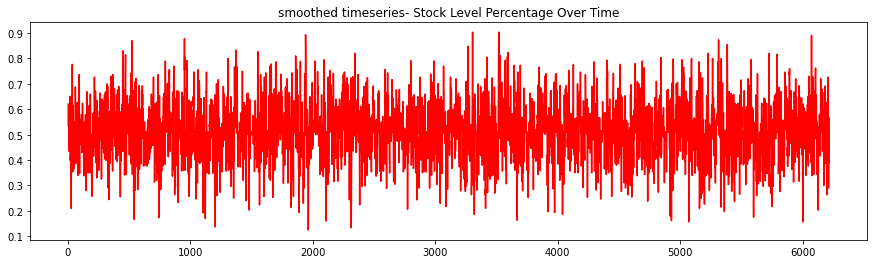

In [60]:
rolling = new_merge['estimated_stock_pct'].rolling(window=3) # using a window of 3 samples: t, t-1, t-2
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

# plot original and transformed dataset
rolling_mean.plot(color='red', figsize=(15,4),title='smoothed timeseries- Stock Level Percentage Over Time')
plt.show()

In [61]:
new_merge['timestamp'] = pd.to_datetime(new_merge['timestamp'])
new_merge

,timestamp,quantity,estimated_stock_pct,temperature,unit_price,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,...,category_meat,category_medicine,category_packaged foods,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables
0,2022-03-01 09:00:00,3,0.89,-0.028850,11.19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022-03-01 17:00:00,1,0.57,-0.376415,11.19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2022-03-02 09:00:00,4,0.4,-0.672900,11.19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022-03-02 10:00:00,1,0.69,-0.856840,11.19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022-03-02 11:00:00,3,0.51,-0.268298,11.19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,2022-03-06 13:00:00,1,0.51,-0.428084,3.19,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6213,2022-03-06 14:00:00,4,0.68,-0.294007,3.19,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6214,2022-03-06 19:00:00,2,0.51,-0.072701,3.19,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
6215,2022-03-07 10:00:00,2,0.16,-0.379524,3.19,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [62]:
new_merge['day_of_month'] = new_merge['timestamp'].dt.day
new_merge['day_of_week'] = new_merge['timestamp'].dt.dayofweek
new_merge['hour_of_day'] = new_merge['timestamp'].dt.hour
new_merge

,timestamp,quantity,estimated_stock_pct,temperature,unit_price,category_baby products,category_baked goods,category_baking,category_beverages,category_canned foods,...,category_personal care,category_pets,category_refrigerated items,category_seafood,category_snacks,category_spices and herbs,category_vegetables,day_of_month,day_of_week,hour_of_day
0,2022-03-01 09:00:00,3,0.89,-0.028850,11.19,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,9
1,2022-03-01 17:00:00,1,0.57,-0.376415,11.19,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,17
2,2022-03-02 09:00:00,4,0.4,-0.672900,11.19,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,9
3,2022-03-02 10:00:00,1,0.69,-0.856840,11.19,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,10
4,2022-03-02 11:00:00,3,0.51,-0.268298,11.19,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6212,2022-03-06 13:00:00,1,0.51,-0.428084,3.19,0,0,0,0,0,...,0,0,0,0,1,0,0,6,6,13
6213,2022-03-06 14:00:00,4,0.68,-0.294007,3.19,0,0,0,0,0,...,0,0,0,0,1,0,0,6,6,14
6214,2022-03-06 19:00:00,2,0.51,-0.072701,3.19,0,0,0,0,0,...,0,0,0,0,1,0,0,6,6,19
6215,2022-03-07 10:00:00,2,0.16,-0.379524,3.19,0,0,0,0,0,...,0,0,0,0,1,0,0,7,0,10


In [63]:
new_merge.drop(columns='timestamp',inplace=True)


## Section 4-  Modelling 

In [64]:

#Features and targets
X= new_merge.drop(columns='estimated_stock_pct')
y = new_merge['estimated_stock_pct']


In [65]:
print(X.shape)
print(y.shape)

(6217, 28)
(6217,)


In [66]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression #import regression models to compare results
from sklearn.ensemble import RandomForestRegressor


In [67]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)


### Linear regression

In [68]:
lr = LinearRegression()
kf = KFold(n_splits=5, shuffle=True, random_state=42)  # 5-fold cross-validation
cross_val_scores = cross_val_score(lr, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
rmse_scores = np.sqrt(-cross_val_scores)


In [69]:
print("Cross-Validation RMSE Scores:", rmse_scores)
print("Average RMSE:", np.mean(rmse_scores))

Cross-Validation RMSE Scores: [0.19009025 0.18901126 0.18694428 0.1862519  0.18673254]
Average RMSE: 0.18780604490795766


In [70]:
from sklearn.metrics import mean_squared_error, r2_score

lr.fit(X_train,y_train)
pred_lr = lr.predict(X_test)
mse = mean_squared_error(y_test,pred_lr)
r2 = r2_score(y_test,pred_lr)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

Mean Squared Error (MSE): 0.032286967055778944
R-squared (R2): -0.006278611450069471


In [71]:
rmse_lr = np.sqrt(mse)
print(f"Root mean squared error: {rmse_lr}")

Root mean squared error: 0.17968574527707795


The predicted values deviate from the actual stock predictions by 0.18 units on average. It's important to note that while RMSE provides a measure of prediction accuracy, it does not provide information about the model's interpretability or the appropriateness of the features used. 


### Random Forest

In [72]:
from sklearn.preprocessing import StandardScaler #for robust predictions 

In [73]:
rf = RandomForestRegressor()

In [74]:
cross_val_rf= cross_val_score(rf, X_train, y_train, scoring='neg_mean_squared_error', cv=kf)
rmse_rf = np.sqrt(-cross_val_rf)
print("Cross-Validation RMSE Scores:", cross_val_rf)
print("Average RMSE:", np.mean(rmse_rf))

Cross-Validation RMSE Scores: [-0.0408542  -0.0392443  -0.03862055 -0.03986814 -0.03862367]
Average RMSE: 0.19858924193548208


In [75]:
rf.fit(X_train,y_train)
pred_rf = rf.predict(X_test)
mse_rf = mean_squared_error(y_test,pred_rf)
r2_rf = r2_score(y_test,pred_rf)

print("Mean Squared Error (MSE):", mse_rf)
print("R-squared (R2):", r2_rf)

Mean Squared Error (MSE): 0.03632354517206877
R-squared (R2): -0.13208548004978926


In [76]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test, pred_rf)

# Print the result
print(f"Mean Absolute Error (MAE): {mae}")

Mean Absolute Error (MAE): 0.1332940535841882


## Feature importance

In [77]:
#plotting feature importance 
importance = rf.feature_importances_
indices = np.argsort(importance)

feature_importances = pd.DataFrame({
    'features': X.columns,
    'importance': rf.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

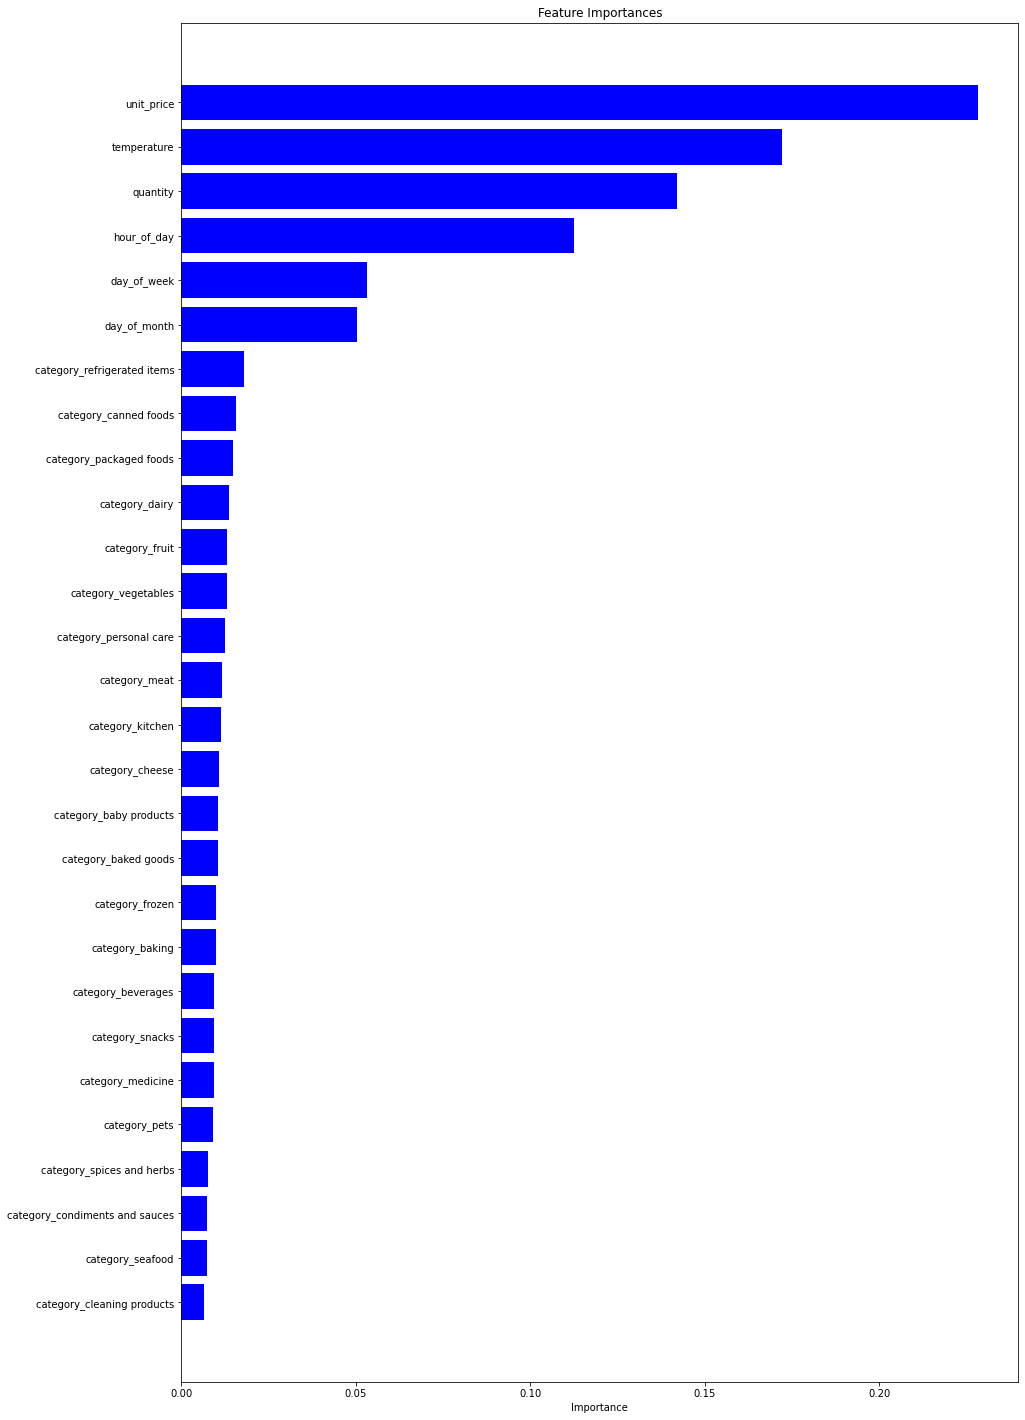

In [78]:
plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='b', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

In [79]:
threshold = 0.05

In [80]:
import plotly.express as px


In [81]:
selected_features = feature_importances[feature_importances['importance'] > threshold]


# Plot with Plotly
fig = px.bar(selected_features, x='features', y='importance', labels={'importance': 'Importance'}, title='Feature Importances Above Threshold')
fig.update_layout(xaxis=dict(tickangle=45))
fig.show()

In [82]:
fig = px.pie(selected_features, values='importance', names='features', title='Feature Importances Above Threshold')
fig.show()